In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque

## 1. Prepare environment and define policy

In [3]:
env = gym.make('CartPole-v0')
print('observation space: ', env.observation_space)
print('action space: ', env.action_space)

observation space:  Box(4,)
action space:  Discrete(2)


In [18]:
class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = np.random.rand(s_size, a_size) * 1e-4
        self.a_size = a_size
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
        
    def act(self, state):
        probs = self.forward(state)
        # action = np.random.choice(self.a_size, p=probs)
        action = np.argmax(probs)
        return action

## 2. Train the agent using Stochastic Policy Search

In [31]:
a = [1,2,3]
b = [2,3,5,5]
for i in zip(a, b):
    print(i)

(1, 2)
(2, 3)
(3, 5)


In [39]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

policy = Policy()

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.inf
    best_w = policy.w
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        rewards = []
        
        for t in range(max_t):
            action = policy.act(state)
            next_state, reward, done, info = env.step(action)
            rewards.append(reward)
            if done:
                break
                
            state = next_state
        
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards))]
        R = sum([a * b for a, b in zip(discounts, rewards)])
        
        if R >= best_R:
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape)
        else:
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_w
            break
    
    return scores

In [40]:
scores = hill_climbing()

Episode 100	Average Score: 175.24
Environment solved in 13 episodes!	Average Score: 196.21


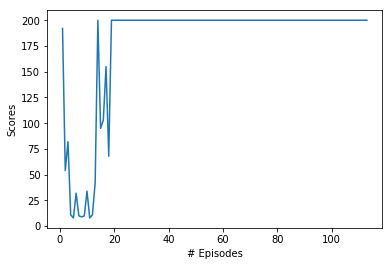

In [45]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(range(1, len(scores) + 1), scores)
plt.ylabel('Scores')
plt.xlabel('# Episodes')
plt.show()

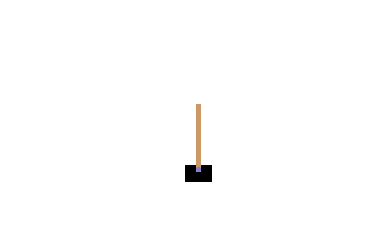

In [46]:
env = gym.make('CartPole-v0')
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))

while True:
    action = policy.act(state)
    next_state, reward, done, _ = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    if done:
        break
        
    state = next_state
    
env.close()